<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/00.%EC%B6%94%EA%B0%80%ED%95%99%EC%8A%B5/ch00_01_OpenCV%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.01. OpenCV기초 - 기본사용

---
* 날짜: 2022.06.13
* 이름: 윤태우

## 학습내용
    - OpenCV 이해하기
    - OpenCV를 이용한 이미지 읽기
    - OpenCV를 이용한 이미지 보기
    - OpenCV를 이용한 이미지 Processing
    - 이미지 저장하기


## 학습자료
- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

```
import numpy as np
import matplotlib.pyplot as plt
import cv2
cv2.__version__
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
cv2.__version__

'4.1.2'

## OpenCV 소개
---

- 영상처리 라이브러리
- 씨플플로 시작하여 3.0 파이썬 자바 제공 
- 딥러닝 라이브러리 대부분이 현재 파이썬


디지털 이미지를 편집할 때 가장 많이 사용되는  파일 유형

![](https://t1.daumcdn.net/cfile/tistory/2217E149551375980F)

#### **벡터(vector) 그래픽스**
반응형 화면 
전체화면-휴대폰화면 에서 비율을 깨지지 않고 보여줄 수 있다.


#### **레스터(raster) 그래픽스**

비트맵, 알지비
오픈시브이 에서는 레스터 그래픽스 사용


## 이미지 읽기 및 보기
---


### **| 이미지 읽기**


#### `cv2.imread(fileName), flage`
* return : 넘파이 배열

#### **이미지 파일 준비**

* 파일 업로드

```
from google.colab import files
upload_file = files.upload()
```

In [6]:
from google.colab import files
upload_file = files.upload()

Saving sea.png to sea (1).png


* 파일 경로 설정

In [7]:
path = '/content/sea.png'

#### **Matplotlib과 비교**

* Matploglib: RGB
  * 이미지 불러오기 : plt.imread() -> RGB로 읽어옴
  * 이미지 보여주기 : plt.imshow()
* OpenCV : GBR
  * 이미지 불러오기 : cv2.imread() -> GBR로 읽어옴
  * 이미지 보여주기 : cv2.imshow()



In [12]:
# 불러오기
plt_img = plt.imread(path)
cv2_img = cv2.imread(path)
print(plt_img.shape, plt_img.dtype, type(plt_img))
print(cv2_img.shape, cv2_img.dtype, type(cv2_img))
print(plt_img[0][0], cv2_img[0][0])

(382, 635, 3) float32 <class 'numpy.ndarray'>
(382, 635, 3) uint8 <class 'numpy.ndarray'>
[0.26666668 0.4745098  0.49019608] [125 121  68]


* '이미지' 데이터

In [9]:
cv2_img[0]

array([[125, 121,  68],
       [120, 116,  63],
       [115, 111,  58],
       ...,
       [ 99,  85,  36],
       [ 94,  80,  31],
       [ 88,  74,  25]], dtype=uint8)

### **| 이미지 보기**

#### **코랩 imshow 패치 함수**

* 원래 함수 : 코랩에서 사용불가

```
cv2.imshow(name, image)
```

In [15]:
# cv2.imshow('img', cv2_img)
# 주피터가 아닌 코랩에서는 사용 불가

* 코랩용 패치 함수

```
from google.colab.patches import cv2_imshow
cv2_imshow(cv2_img)
```

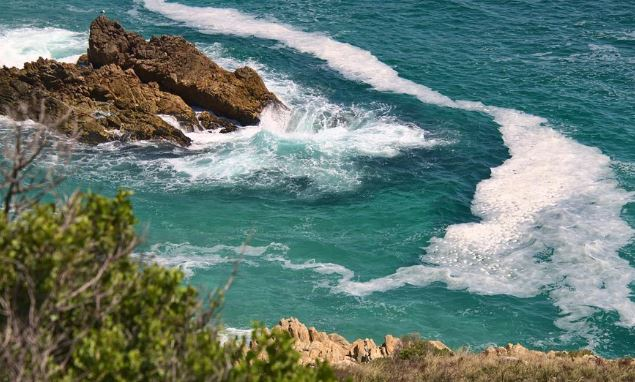

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2_img)

#### **matplotlib으로 이미지 보기**

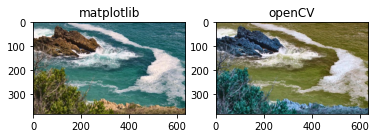

In [21]:
plt.subplot(121)
plt.imshow(plt_img)
plt.title('matplotlib')
plt.subplot(122)
plt.imshow(cv2_img)
plt.title('openCV')
plt.show()
# 이유
# imread 할 때
# - matplotlib : RGB로 읽어옴
# - openCV : GBR로 읽어옴

## 이미지 Processing
---

**이미지 좌표 형식**

디지털 영상은 2차원 행렬의 형태로 표현이 되며. 각 격자가 하나의 pixel이 됩니다. 
![](https://opencv-python.readthedocs.io/en/latest/_images/image1.png)

### **| Digital Image의 유형**

#### **Binary Image**

Binary Image는 pixel당 1bit로 표현하는 영상을 의미합니다. 즉 흰색과 검은색으로만 표현이 되는 영상입니다.

![](https://opencv-python.readthedocs.io/en/latest/_images/image2.png)


* 우측 상단 : thresholding처리를 하여 binary image로 변환
* 우측 하단 : binary image의 밀도를 조절하여 밝기를 표현 

#### **Grayscale Image**

![](https://opencv-python.readthedocs.io/en/latest/_images/image3.png)

Grayscale Image는 Pixel당 8bit, 즉 256단계의 명암(빛의 세기)을 표현할 수 있는 이미지입니다.

#### **Color Image**

* pixel의 색을 표현하기 위해서 채널별 pixel당 8bit 사용(0~255)
* 총 16,777,216 가지의 색을 표현 (256x256x256)


#### **RGB Clor-space vs HSV color-space**


![](https://opencv-python.readthedocs.io/en/latest/_images/image5.png)
![](https://opencv-python.readthedocs.io/en/latest/_images/image6.png)

* RGB : 빛의 삼원색의 3채널 
* HSV : 색, 채도, 명도의 3채널

### **| Color-space 변환**

#### `cv2.cvtColor(src, code)`
* Parameters:
  * src : 이미지 배열
  * code : 변환 코드

In [26]:
# cv2_img : BGR
gray_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2HSV)
lab_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2LAB)
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
p_gray_img = cv2.cvtColor(plt_img, cv2.COLOR_BGR2GRAY)
p_hsv_img = cv2.cvtColor(plt_img, cv2.COLOR_BGR2HSV)
p_lab_img = cv2.cvtColor(plt_img, cv2.COLOR_BGR2LAB)
p_rgb_img = cv2.cvtColor(plt_img, cv2.COLOR_BGR2RGB)

* plt로 변환 이미지 확인하기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


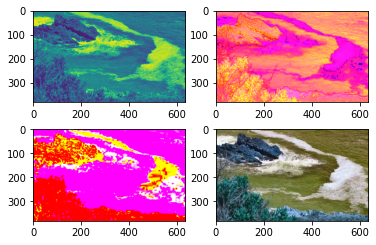

In [27]:
imgs = [p_gray_img, p_hsv_img, p_lab_img, p_rgb_img]
for i,img in enumerate(imgs) :
  plt.subplot(2,2,i+1)
  plt.imshow(img)
plt.show()

* cv2로 변환 이미지 확인하기

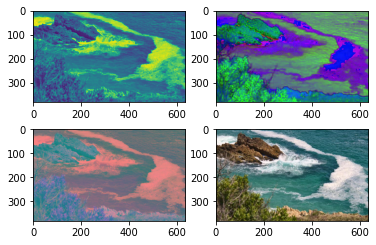

In [28]:
imgs = [gray_img, hsv_img, lab_img, rgb_img]
for i,img in enumerate(imgs) :
  plt.subplot(2,2,i+1)
  plt.imshow(img)
plt.show()

## 이미지 저장
---

#### `cv2.imwrite(fileName, image)`
* Parameters
  * fileName(str) : 저장될 파일명
  * image : 저장할 이미지

In [33]:
cv2.imwrite('ch1.png', cv2_img)

True

## 예제
---

* 동물사진 1장
* 차량 혹은 도로위 차량 사진 1장

Color-space 변환 적용 해보기 (다른 변환 코드)

In [ ]:
from google.colab import files
files.upload()

In [57]:
animal = cv2.imread('/content/다람쥐.jpg')
car = cv2.imread('/content/자동차.jpg')
p_animal = plt.imread('/content/다람쥐.jpg')
p_car = plt.imread('/content/자동차.jpg')
print(animal.shape, car.shape, p_animal.shape, p_car.shape)

(168, 300, 3) (168, 299, 3) (168, 300, 3) (168, 299, 3)


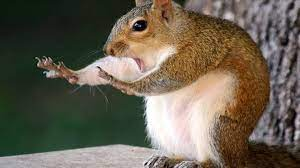

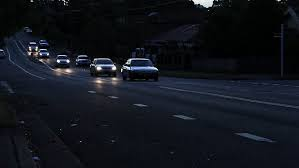

In [42]:
from google.colab.patches import cv2_imshow
cv2_imshow(animal)
cv2_imshow(car)

In [72]:
a1 = cv2.cvtColor(p_animal, cv2.COLOR_BGR2HLS)
a2 = cv2.cvtColor(p_animal, cv2.COLOR_BGR2Luv)
a3 = cv2.cvtColor(p_animal, cv2.COLOR_BGR2XYZ)

c1 = cv2.cvtColor(p_car, cv2.COLOR_BGR2HLS)
c2 = cv2.cvtColor(p_car, cv2.COLOR_BGR2Luv)
c3 = cv2.cvtColor(p_car, cv2.COLOR_BGR2XYZ)

In [73]:
print(a1.shape,a2.shape,a3.shape)
print(c1.shape,c2.shape,c3.shape)

(168, 300, 3) (168, 300, 3) (168, 300, 3)
(168, 299, 3) (168, 299, 3) (168, 299, 3)


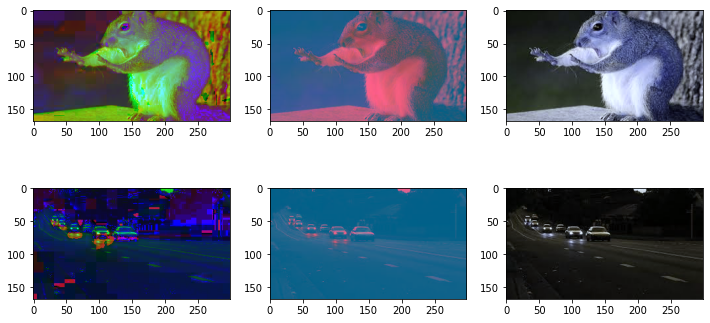

In [75]:
plt.figure(figsize=(12,6))
imgs = [a1, a2, a3, c1, c2, c3]
for i,img in enumerate(imgs) :
  plt.subplot(2,3,i+1)
  plt.imshow(img)
plt.show()